In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Instructions
Use the techniques in the lesson to explore the **store item demand** dataset and the **opsd** dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

# Store Item Demand
## Prep

In [2]:
df = pd.read_csv('gulde_all.csv', index_col=0)
df.head(2)

,sale_id,sale_date,sale_amount,item_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_id,store_state,store_city,store_zipcode,store_address
0,1,"Tue, 01 Jan 2013 00:00:00 GMT",13.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,TX,San Antonio,78253,12125 Alamo Ranch Pkwy
1,2,"Wed, 02 Jan 2013 00:00:00 GMT",11.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,TX,San Antonio,78253,12125 Alamo Ranch Pkwy


In [3]:
# check if each observation's date is unique
print('Total length:', len(df))
print('Number of uniques:', len(df.sale_date.unique()))

Total length: 913000
Number of uniques: 1826


In [4]:
# check further
print(df.sale_date.dtype)

object


In [5]:
# convert to datetime format, set it to index, drop column
df['sale_date'] = df.sale_date.astype('datetime64')
df.index = df.sale_date
df = df.drop(columns='sale_date')
df.head(2)

,sale_id,sale_amount,item_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_id,store_state,store_city,store_zipcode,store_address
sale_date,,,,,,,,,,,,,
2013-01-01,1,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,TX,San Antonio,78253,12125 Alamo Ranch Pkwy
2013-01-02,2,11.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,TX,San Antonio,78253,12125 Alamo Ranch Pkwy


In [6]:
# check dates to see precision
print(df.index.hour.unique())
print(df.index.day.unique())

Int64Index([0], dtype='int64', name='sale_date')
Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='sale_date')


In [7]:
# create new dataframe resampled to day
daily_df = df[['sale_amount']].resample('D').sum()
daily_df.sample(3)

,sale_amount
sale_date,
2017-11-16,30732.0
2016-11-20,35488.0
2017-11-15,28607.0


## Split

<AxesSubplot:xlabel='sale_date'>

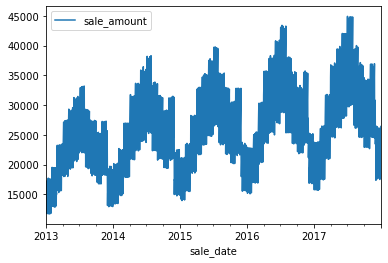

In [8]:
# check for cycle
daily_df.plot()

In [9]:
# there are 5 cycles; splitting train into first 4, test into last 1
# fix dtype
daily_df['sale_amount'] = daily_df.sale_amount.astype('int')
# split
train = daily_df[daily_df.index.year < 2017]
test = daily_df[daily_df.index.year >= 2017]
# check split
train.shape[0] + test.shape[0] == daily_df.shape[0]

True

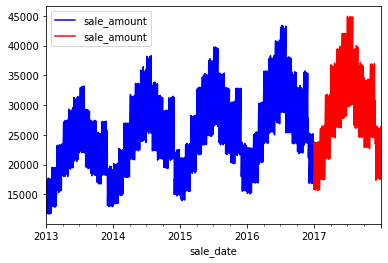

In [10]:
# check split distribution
ax = train.plot(c='blue')
test.plot(ax=ax, c='red')
plt.show()

## Explore

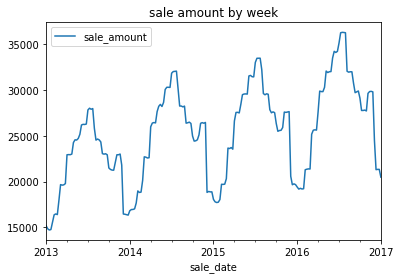

In [11]:
train.resample('W').mean().plot()
plt.title('sale amount by week')
plt.show()

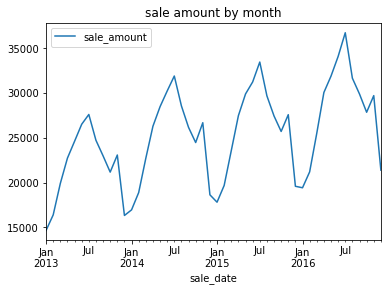

In [12]:
train.resample('M').mean().plot()
plt.title('sale amount by month')
plt.show()

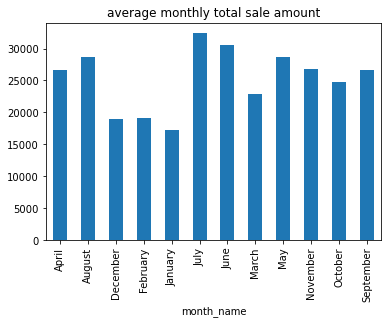

In [13]:
train['month_name'] = train.index.month_name()
train.groupby('month_name').sale_amount.mean().plot.bar()
plt.title('average monthly total sale amount')
plt.show()
train = train.drop(columns='month_name')

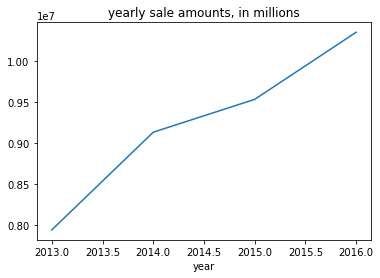

In [14]:
train['year'] = train.index.year
train.groupby('year').sale_amount.sum().plot()
plt.title('yearly sale amounts, in millions')
plt.show()
train = train.drop(columns='year')

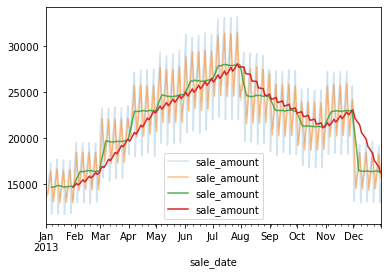

In [15]:
ax = train[train.index.year == 2013].plot(alpha=.2, label='Hourly')
train[train.index.year == 2013].resample('D').mean().rolling(3).mean().plot(ax=ax, alpha=.5, label='3 day')
train[train.index.year == 2013].resample('D').mean().rolling(7).mean().plot(ax=ax, alpha=.8, label='1 week')
train[train.index.year == 2013].resample('D').mean().rolling(30).mean().plot(ax=ax, alpha=1, label='30 days')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Average monthly change in sale amount'}, xlabel='sale_date'>

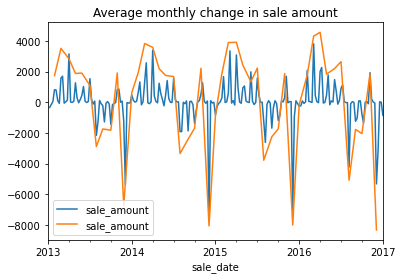

In [16]:
ax = train.resample('W').mean().diff().plot(title='Average week-to-week change in sale amount')
train.resample('M').mean().diff().plot(ax=ax, title='Average monthly change in sale amount')

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

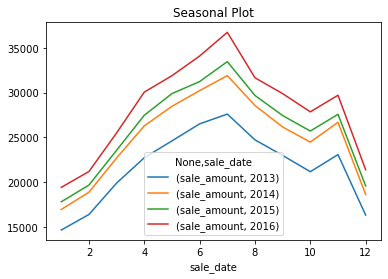

In [17]:
train.groupby([train.index.year, train.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

Text(0.5, 1.0, 'Lag plot with lag=1')

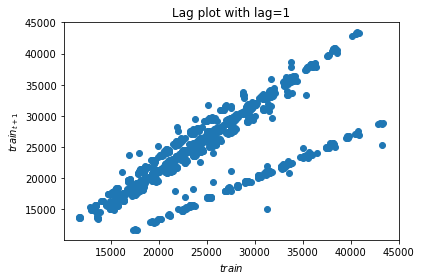

In [18]:
plt.scatter(train, train.shift(-1))
plt.xlabel('$train$')
plt.ylabel('$train_{t + 1}$')
plt.title('Lag plot with lag=1')

,this_week,the_next_week
sale_date,,
2013-01-06,15177.833333,14843.142857
2013-01-13,14843.142857,14707.142857
2013-01-20,14707.142857,14756.857143
2013-01-27,14756.857143,15575.285714
2013-02-03,15575.285714,16366.571429
...,...,...
2016-12-04,24508.428571,21309.285714
2016-12-11,21309.285714,21341.142857
2016-12-18,21341.142857,21340.142857


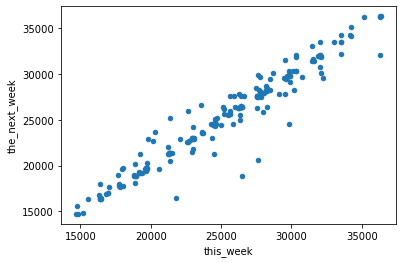

In [19]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sale_amount.shift(-1)
weekly = weekly.rename(columns={'sale_amount': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

,this_week,12_weeks_out
sale_date,,
2013-01-06,15177.833333,19787.571429
2013-01-13,14843.142857,22937.571429
2013-01-20,14707.142857,22954.714286
2013-01-27,14756.857143,22946.142857
2013-02-03,15575.285714,23011.571429
...,...,...
2016-12-04,24508.428571,NaN
2016-12-11,21309.285714,NaN
2016-12-18,21341.142857,NaN


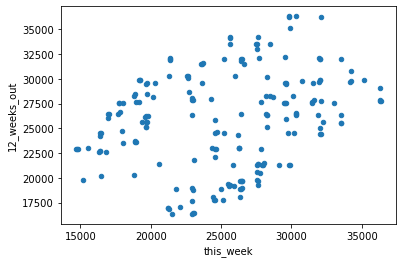

In [20]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.sale_amount.shift(-12)
weekly = weekly.rename(columns={'sale_amount': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,this_week,half_a_year_later
sale_date,,
2013-01-06,15177.833333,27838.714286
2013-01-13,14843.142857,28030.428571
2013-01-20,14707.142857,27916.000000
2013-01-27,14756.857143,27991.714286
2013-02-03,15575.285714,25837.428571
...,...,...
2016-12-04,24508.428571,NaN
2016-12-11,21309.285714,NaN
2016-12-18,21341.142857,NaN


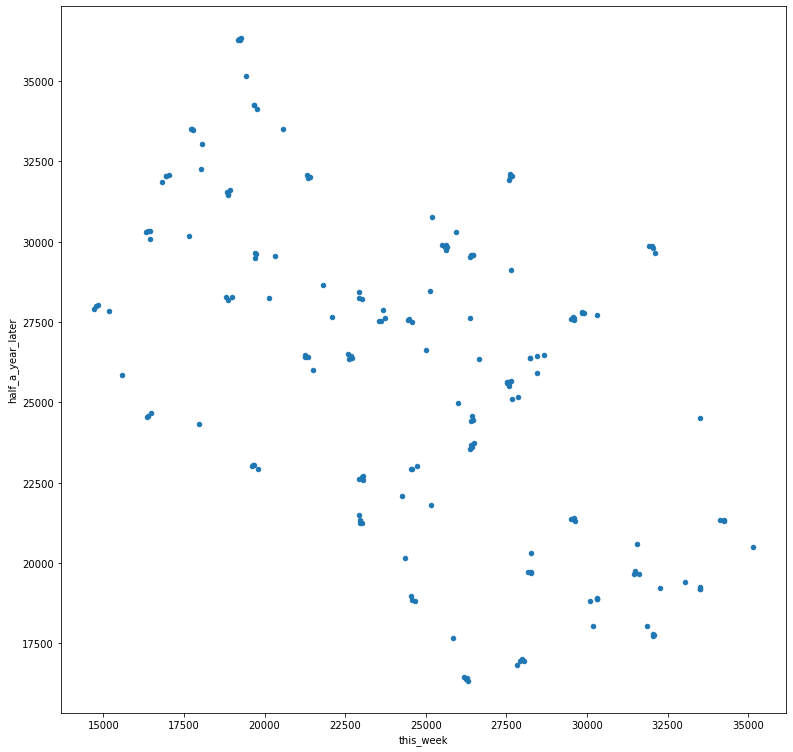

In [21]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.sale_amount.shift(-26)
weekly = weekly.rename(columns={'sale_amount': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

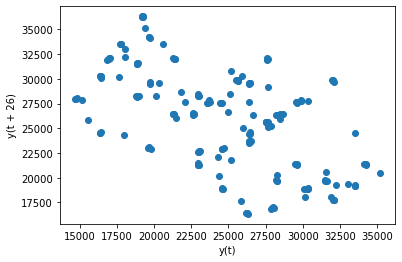

In [22]:
pd.plotting.lag_plot(train.sale_amount.resample('W').mean(), lag=26)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

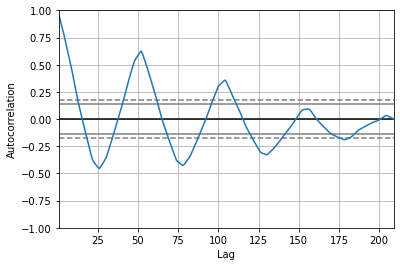

In [23]:
pd.plotting.autocorrelation_plot(train.sale_amount.resample('W').mean())

# OPSD Data
## Prep

In [24]:
# cache
df = pd.read_csv('opsd_germany_daily.csv', index_col=1)
# drop column
df.drop(columns='Unnamed: 0', inplace=True)
df.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [25]:
# check things
print(df.index.dtype) # object, will convert to datetime
print(df.index.unique()) # precise to the day
print("length of df", len(df)) # 4383 rows
print("number of uniques:", df.index.nunique()) # 4383, so no duplicates

object
Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)
length of df 4383
number of uniques: 4383


In [26]:
# convert date column to datetime64
df.index = df.index.astype('datetime64[ns]')
df.index.dtype

dtype('<M8[ns]')

In [27]:
# create time-series df
daily_energy = df[['Consumption']]

<AxesSubplot:xlabel='Date'>

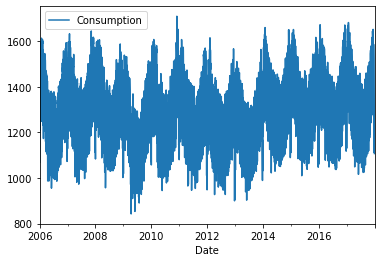

In [28]:
# plot distribution
daily_energy.plot()

In [29]:
# cycle is yearly, 12 cycles, so 3 cycles is 25%, so test > year 2015
train = daily_energy[daily_energy.index.year < 2015]
test = daily_energy[daily_energy.index.year >= 2015]
train.shape[0] + test.shape[0] == daily_energy.shape[0]

True

<AxesSubplot:xlabel='Date'>

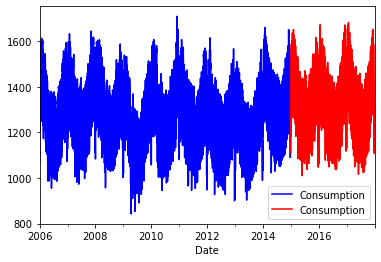

In [30]:
# plot again
ax = train.plot(c='blue')
test.plot(ax=ax, c='red')

## Explore

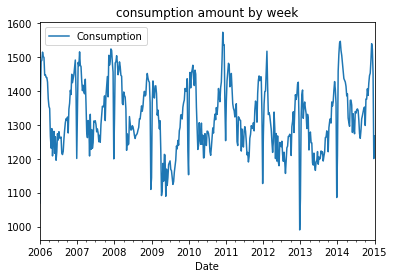

In [31]:
train.resample('W').mean().plot()
plt.title('consumption amount by week')
plt.show()

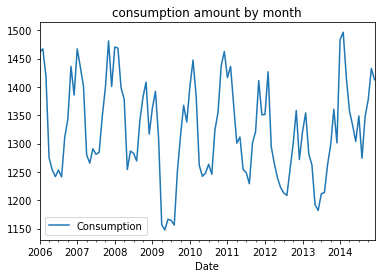

In [32]:
train.resample('M').mean().plot()
plt.title('consumption amount by month')
plt.show()

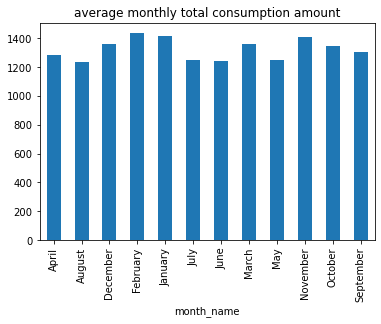

In [33]:
train['month_name'] = train.index.month_name()
train.groupby('month_name').Consumption.mean().plot.bar()
plt.title('average monthly total consumption amount')
plt.show()
train = train.drop(columns='month_name')

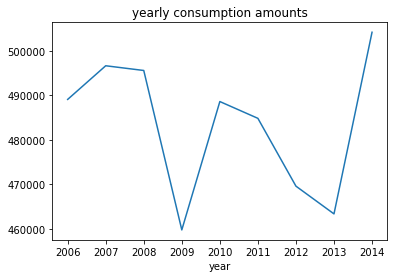

In [34]:
train['year'] = train.index.year
train.groupby('year').Consumption.sum().plot()
plt.title('yearly consumption amounts')
plt.show()
train = train.drop(columns='year')

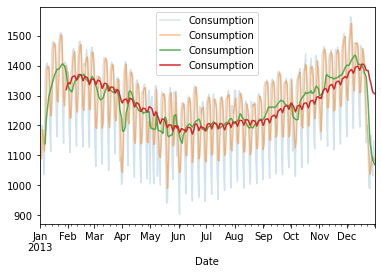

In [35]:
ax = train[train.index.year == 2013].plot(alpha=.2, label='Hourly')
train[train.index.year == 2013].resample('D').mean().rolling(3).mean().plot(ax=ax, alpha=.5, label='3 day')
train[train.index.year == 2013].resample('D').mean().rolling(7).mean().plot(ax=ax, alpha=.8, label='1 week')
train[train.index.year == 2013].resample('D').mean().rolling(30).mean().plot(ax=ax, alpha=1, label='30 days')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Average monthly change in consumption'}, xlabel='Date'>

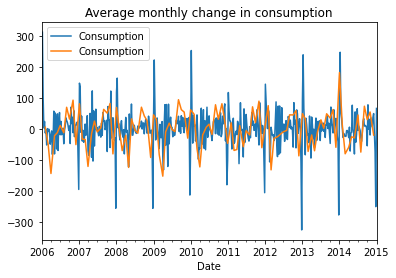

In [36]:
ax = train.resample('W').mean().diff().plot(title='Average week-to-week change in consumption')
train.resample('M').mean().diff().plot(ax=ax, title='Average monthly change in consumption')

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='Date'>

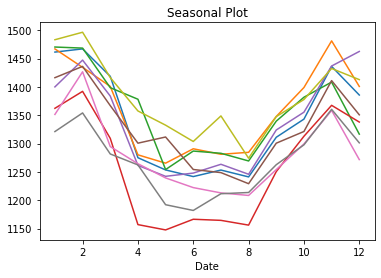

In [37]:
train.groupby([train.index.year, train.index.month]).mean().unstack(0).plot(title='Seasonal Plot', legend=None)

Text(0.5, 1.0, 'Lag plot with lag=1')

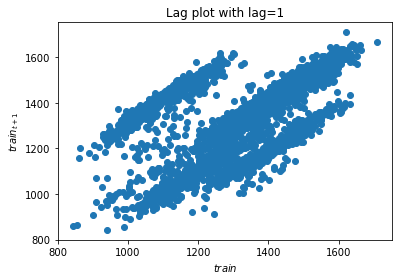

In [38]:
plt.scatter(train, train.shift(-1))
plt.xlabel('$train$')
plt.ylabel('$train_{t + 1}$')
plt.title('Lag plot with lag=1')

,this_week,the_next_week
Date,,
2006-01-01,1069.184000,1381.300143
2006-01-08,1381.300143,1486.730286
2006-01-15,1486.730286,1490.031143
2006-01-22,1490.031143,1514.176857
2006-01-29,1514.176857,1501.403286
...,...,...
2014-12-07,1539.108571,1523.639286
2014-12-14,1523.639286,1451.012286
2014-12-21,1451.012286,1200.321429


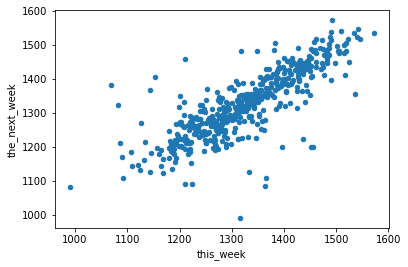

In [39]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.Consumption.shift(-1)
weekly = weekly.rename(columns={'Consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

,this_week,12_weeks_out
Date,,
2006-01-01,1069.184000,1376.688714
2006-01-08,1381.300143,1354.122000
2006-01-15,1486.730286,1347.883429
2006-01-22,1490.031143,1265.716143
2006-01-29,1514.176857,1231.136143
...,...,...
2014-12-07,1539.108571,NaN
2014-12-14,1523.639286,NaN
2014-12-21,1451.012286,NaN


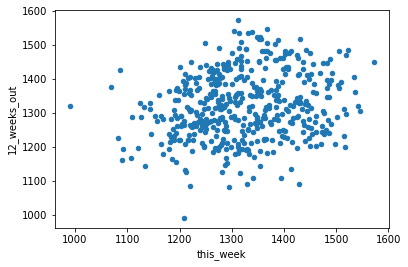

In [40]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.Consumption.shift(-12)
weekly = weekly.rename(columns={'Consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,this_week,half_a_year_later
Date,,
2006-01-01,1069.184000,1254.896857
2006-01-08,1381.300143,1279.510571
2006-01-15,1486.730286,1260.945286
2006-01-22,1490.031143,1261.179714
2006-01-29,1514.176857,1263.756571
...,...,...
2014-12-07,1539.108571,NaN
2014-12-14,1523.639286,NaN
2014-12-21,1451.012286,NaN


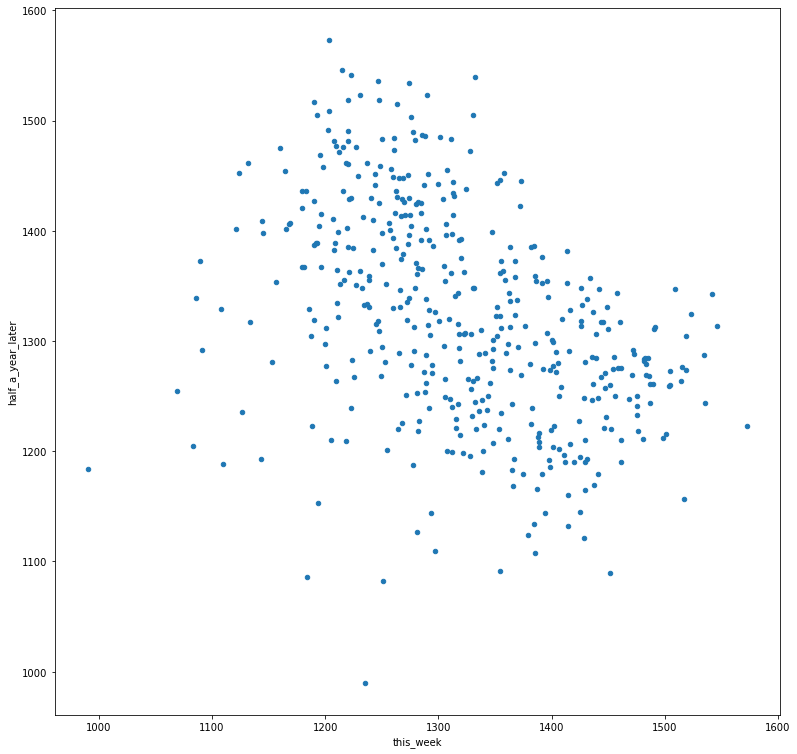

In [41]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.Consumption.shift(-26)
weekly = weekly.rename(columns={'Consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

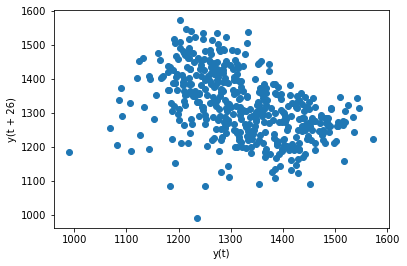

In [42]:
pd.plotting.lag_plot(train.Consumption.resample('W').mean(), lag=26)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

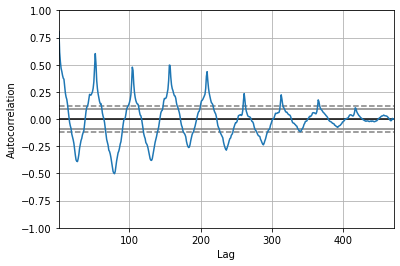

In [43]:
pd.plotting.autocorrelation_plot(train.Consumption.resample('W').mean())